## Notebook 1: Forma de los Datos

## Filtracion de Complejos Simpliciales e Inferencia de los Datos

### Importar librerias

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm #Manejar colores
from scipy.spatial.distance import squareform,pdist #Calcular matrices de distancias
import matplotlib.patches as mpatches #Para hacer elipses
from matplotlib.collections import PatchCollection #Hacer elipses
import gudhi

Vamos a trabajar con una base de datos pequeña de puntos en el plano. Vamos a ver como interpretar el arbol de simplejos. A su vez, se vera como filtrar los complejos simpliciales para inferir la forma de los datos

       a   b
Point       
P1     1   1
P2     7   0
P3     4   6
P4     9   6
P5     0  14
P6     2  19
P7     9  17


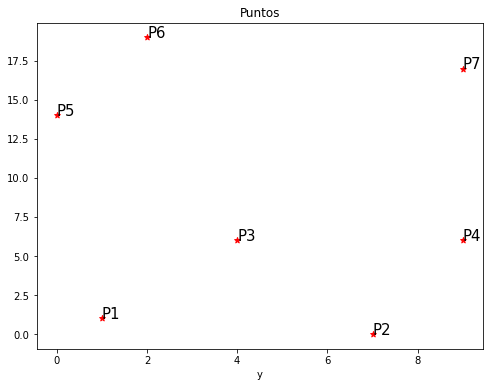

In [10]:
a = [1,7,4,9,0,2,9]
b = [1,0,6,6,14,19,17]


point = ["P1","P2","P3","P4","P5","P6","P7"]

data = pd.DataFrame({"Point": point,"a":a,"b": b})
data =  data.set_index("Point")
print(data)

plt.figure(figsize=(8,6))

plt.scatter(data["a"],data["b"],c="r",marker="*")
plt.xlabel("x")
plt.xlabel("y")
plt.title("Puntos")

for j in data.itertuples():
    plt.annotate(j.Index,(j.a,j.b),fontsize=15)

Del puro grafo, no podemos inferir que hay una forma precisa de los datos. Podemos acotar !!!

In [11]:
#Calculamos la matriz de Distancias Eucledianas

dist = pd.DataFrame(squareform(pdist(data[["a","b"]]),"euclidean"),columns=data.index.values,index=data.index.values)
dist

,P1,P2,P3,P4,P5,P6,P7
P1,0.000000,6.082763,5.830952,9.433981,13.038405,18.027756,17.888544
P2,6.082763,0.000000,6.708204,6.324555,15.652476,19.646883,17.117243
P3,5.830952,6.708204,0.000000,5.000000,8.944272,13.152946,12.083046
P4,9.433981,6.324555,5.000000,0.000000,12.041595,14.764823,11.000000
P5,13.038405,15.652476,8.944272,12.041595,0.000000,5.385165,9.486833
P6,18.027756,19.646883,13.152946,14.764823,5.385165,0.000000,7.280110
P7,17.888544,17.117243,12.083046,11.000000,9.486833,7.280110,0.000000


Vemos que el diametro dee la base de datos (como espacio metrico finito) es de 19.646883. Por lo tanto, podemos acotar el parametro r en el complejo simplicial de Rips a 20 y con esto garantizamos que el ultimo complejo simplicial

In [18]:

#Calculas la filtracion de Rips con un radio de 20
rips_complex = gudhi.RipsComplex(points=data[['a', 'b']].values, max_edge_length=20.0)

In [19]:
#Generamos el arbol de complejos simpliciales e imprimimos la informacion
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension' +repr(simplex_tree.dimension())+'-'+\
    repr(simplex_tree.num_simplices())+' simplices -' +\
    repr(simplex_tree.num_vertices())+'vertices.'
print(result_str)
fmt='%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Rips complex is of dimension2-63 simplices -7vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[2, 3] -> 5.00
[4, 5] -> 5.39
[0, 2] -> 5.83
[0, 1] -> 6.08
[1, 3] -> 6.32
[1, 2] -> 6.71
[0, 1, 2] -> 6.71
[1, 2, 3] -> 6.71
[5, 6] -> 7.28
[2, 4] -> 8.94
[0, 3] -> 9.43
[0, 1, 3] -> 9.43
[0, 2, 3] -> 9.43
[4, 6] -> 9.49
[4, 5, 6] -> 9.49
[3, 6] -> 11.00
[3, 4] -> 12.04
[2, 3, 4] -> 12.04
[3, 4, 6] -> 12.04
[2, 6] -> 12.08
[2, 3, 6] -> 12.08
[2, 4, 6] -> 12.08
[0, 4] -> 13.04
[0, 2, 4] -> 13.04
[0, 3, 4] -> 13.04
[2, 5] -> 13.15
[2, 4, 5] -> 13.15
[2, 5, 6] -> 13.15
[3, 5] -> 14.76
[2, 3, 5] -> 14.76
[3, 4, 5] -> 14.76
[3, 5, 6] -> 14.76
[1, 4] -> 15.65
[0, 1, 4] -> 15.65
[1, 2, 4] -> 15.65
[1, 3, 4] -> 15.65
[1, 6] -> 17.12
[1, 2, 6] -> 17.12
[1, 3, 6] -> 17.12
[1, 4, 6] -> 17.12
[0, 6] -> 17.89
[0, 1, 6] -> 17.89
[0, 2, 6] -> 17.89
[0, 3, 6] -> 17.89
[0, 4, 6] -> 17.89
[0, 5] -> 18.03
[0, 2, 5] -> 18.03
[0, 3, 5] -> 18.03
[0, 4, 5] -> 18.03
[0, 5

In [22]:
def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass

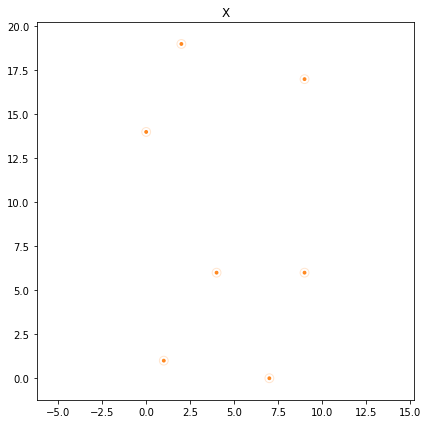

In [23]:
X = data[['a', 'b']].values
plot_rips_complex(X, R=0.25,label='X',maxdim=1)